In [89]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [90]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [91]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3316,ham,"No worries, hope photo shoot went well. have a...",NaN,NaN,NaN
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
2752,ham,Sat right? Okay thanks...,NaN,NaN,NaN
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN
5336,ham,Sounds better than my evening im just doing my...,NaN,NaN,NaN


In [92]:
df.shape

(5572, 5)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [94]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [95]:
df.sample(5)

,v1,v2
646,ham,Do you mind if I ask what happened? You dont h...
4767,ham,I'm not sure if its still available though
5078,ham,Mark works tomorrow. He gets out at 5. His wor...
1463,ham,Ok good then i later come find Ì_... C lucky i...
4920,ham,Its so common hearin How r u? Wat r u doing? H...


In [96]:
# remaining the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
377,ham,Well there's not a lot of things happening in ...
266,ham,"Not sure yet, still trying to get a hold of him"
2983,ham,He said that he had a right giggle when he saw...
2254,ham,Ok. Me watching tv too.
3010,ham,"Hm good morning, headache anyone? :-)"


In [97]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [98]:
df['target'] = encoder.fit_transform(df['target'])

In [99]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [101]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [102]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df.shape

(5169, 2)

## EDA

In [105]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

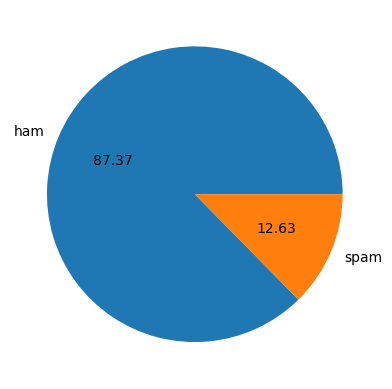

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [108]:
# Data is imbalanced

In [109]:
import nltk

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [110]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [111]:
df['num_characters'] = df['text'].apply(len)

In [112]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [114]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [115]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [118]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [120]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

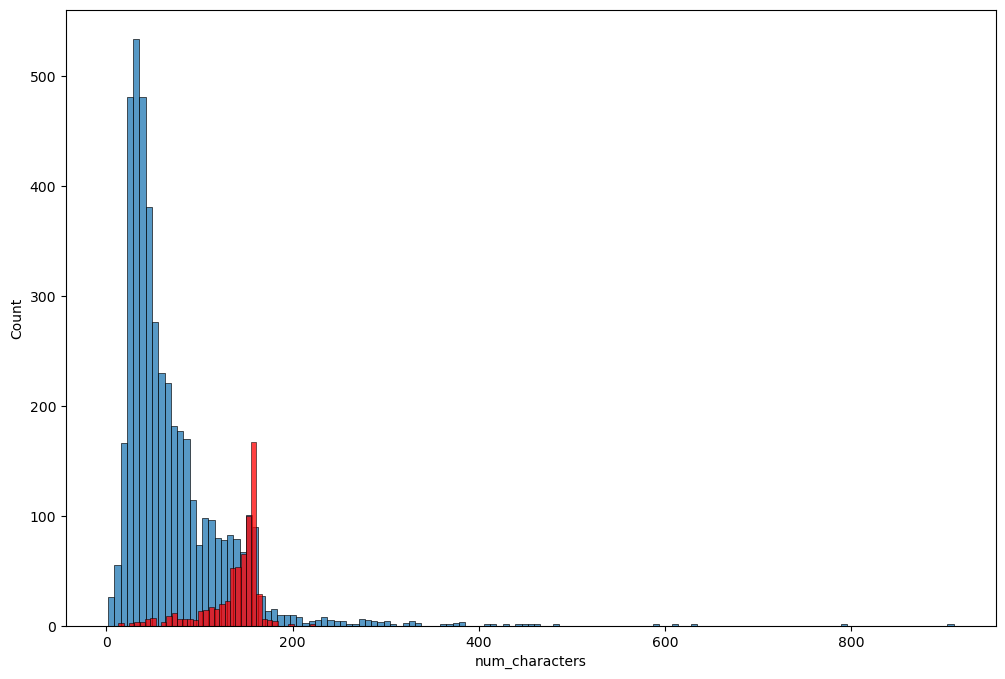

In [121]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

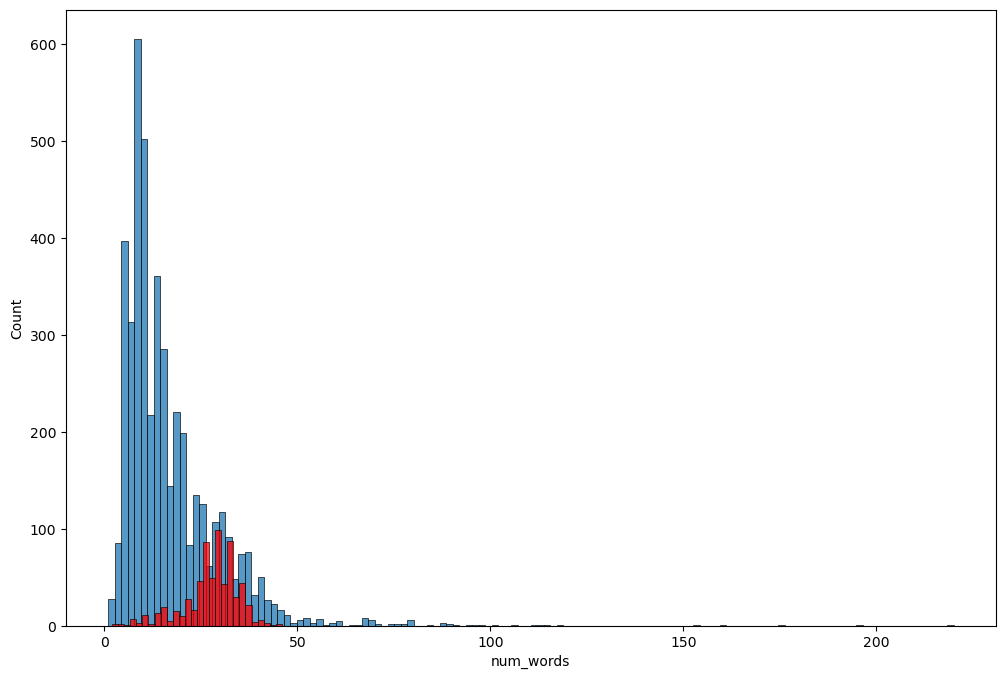

In [122]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

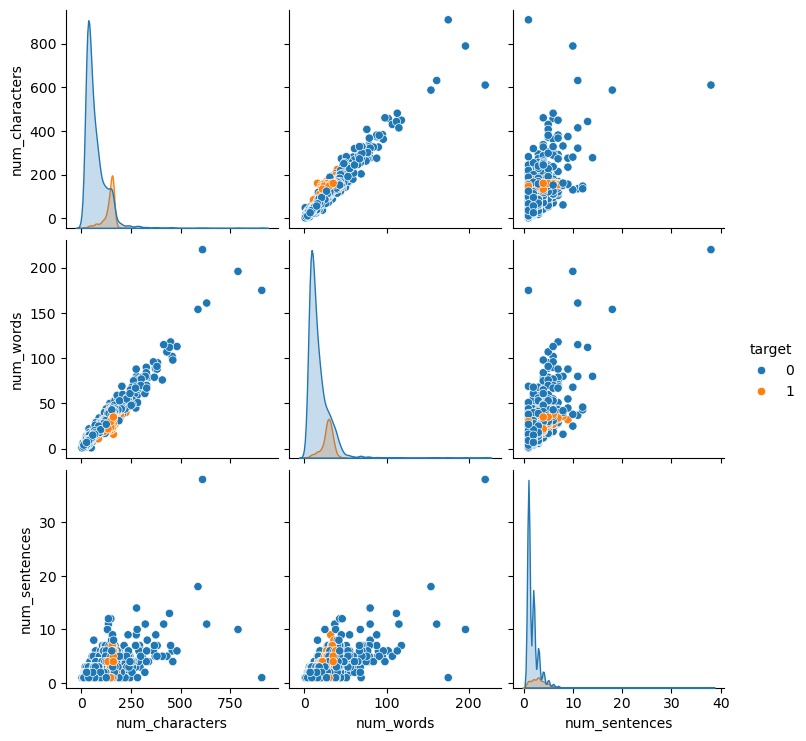

In [123]:
sns.pairplot(df, hue='target')

<Axes: >

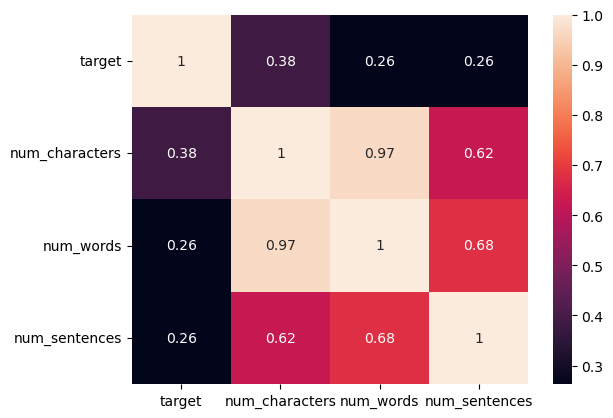

In [124]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [125]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91830\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [126]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [127]:
transform_text("Misplaced your number and was sending texts to your old number. Wondering why i've not heard from you this year. All the best in your mcat. Got this number from my atlanta friends")

'misplac number send text old number wonder heard year best mcat got number atlanta friend'

In [128]:
df['text'][220]

'Ok no prob. Take ur time.'

In [129]:
df['transformed_text'] = df['text'].apply(transform_text)

In [130]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [131]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [132]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) 

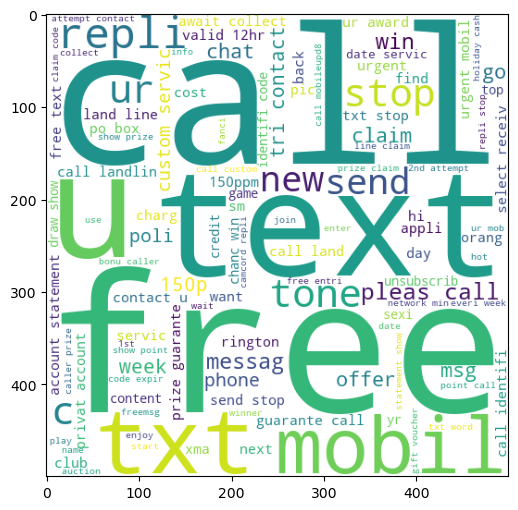

In [133]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [134]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) 

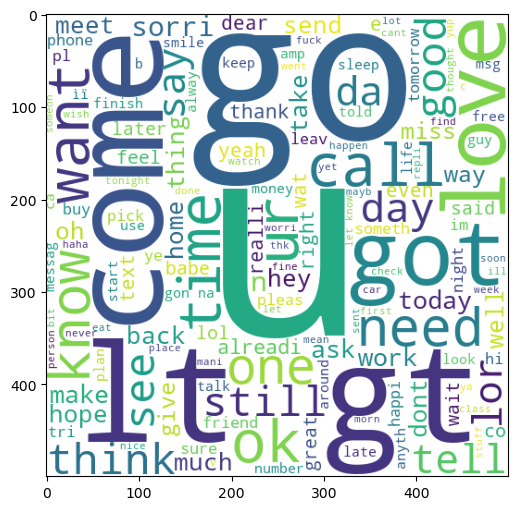

In [135]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [136]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [137]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [138]:
len(spam_corpus)

9939

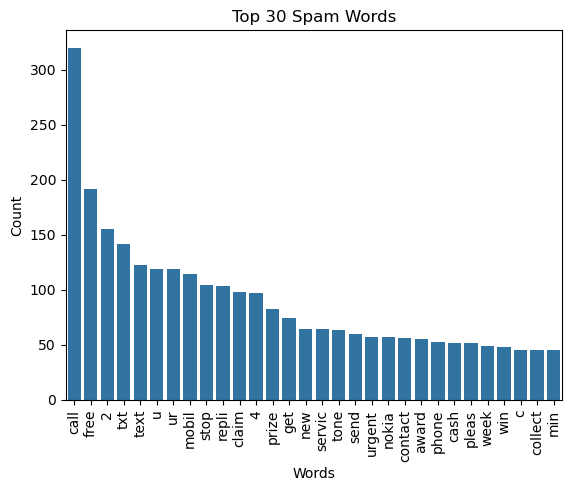

In [139]:
from collections import Counter
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Words')
plt.title('Top 30 Spam Words', fontsize=12)
plt.show()

In [140]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [141]:
len(ham_corpus)

35404

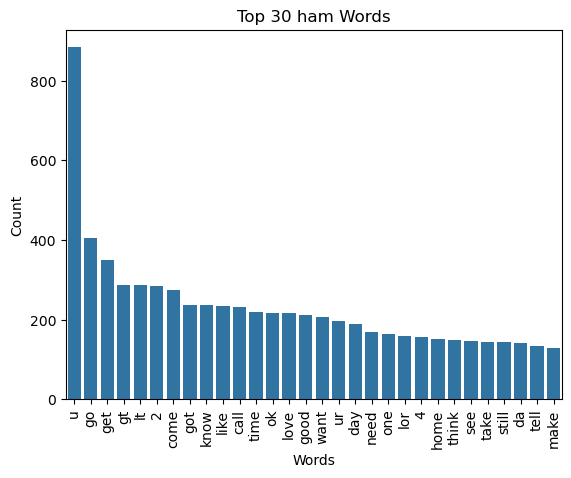

In [142]:
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Words')
plt.title('Top 30 ham Words', fontsize=12)
plt.show()

## Model Building

In [143]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [144]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [145]:
X.shape

(5169, 3000)

In [146]:
Y = df['target'].values

In [147]:
Y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 42)

In [150]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [151]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [152]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [153]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [154]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [69]:
# tfidf --> MNB

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [156]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [157]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NaiveBayes': mnb,
    'DecisionTree': dtc,
    'LogisticRegression': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'Bagging': bc,
    'ExtraTrees': etc,
    'GradientBoosting': gbdt,
    'XGBoost': xgb
}


In [158]:
def train_classifier(clf, X_train,Y_train,X_test,Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)

    return accuracy,precision

In [159]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.97678916827853, 0.9548872180451128)

In [161]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test,Y_test)

    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.97678916827853
Precision - 0.9548872180451128
For KNN
Accuracy - 0.9090909090909091
Precision - 1.0
For NaiveBayes
Accuracy - 0.9729206963249516
Precision - 0.9915966386554622
For DecisionTree
Accuracy - 0.9332688588007737
Precision - 0.8275862068965517
For LogisticRegression
Accuracy - 0.9468085106382979
Precision - 0.8688524590163934
For RandomForest
Accuracy - 0.971953578336557
Precision - 0.9754098360655737
For AdaBoost
Accuracy - 0.9158607350096711
Precision - 0.8085106382978723
For Bagging
Accuracy - 0.9622823984526112
Precision - 0.8840579710144928
For ExtraTrees
Accuracy - 0.9777562862669246
Precision - 0.9841269841269841
For GradientBoosting
Accuracy - 0.9468085106382979
Precision - 0.96875
For XGBoost
Accuracy - 0.9661508704061895
Precision - 0.9435483870967742


In [162]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision',ascending=False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.909091,1.000000
2,NaiveBayes,0.972921,0.991597
8,ExtraTrees,0.977756,0.984127
5,RandomForest,0.971954,0.975410
9,GradientBoosting,0.946809,0.968750
0,SVC,0.976789,0.954887
10,XGBoost,0.966151,0.943548
7,Bagging,0.962282,0.884058
4,LogisticRegression,0.946809,0.868852
3,DecisionTree,0.933269,0.827586


In [164]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

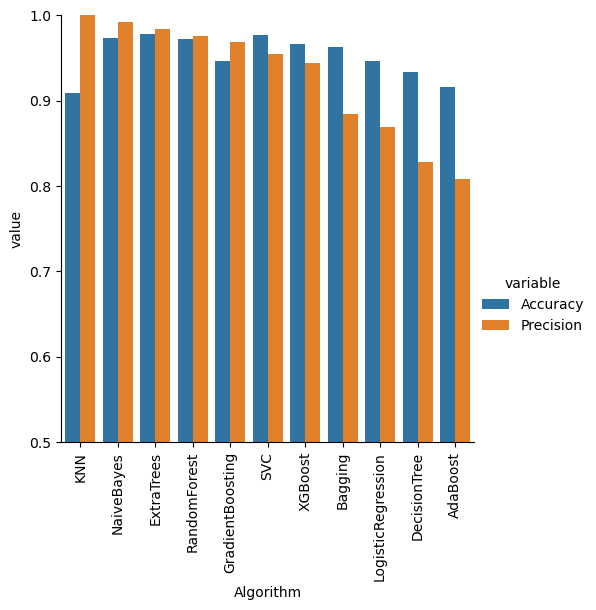

In [165]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation=90)
plt.show() 

In [166]:
performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.909091
1,NaiveBayes,Accuracy,0.972921
2,ExtraTrees,Accuracy,0.977756
3,RandomForest,Accuracy,0.971954
4,GradientBoosting,Accuracy,0.946809
5,SVC,Accuracy,0.976789
6,XGBoost,Accuracy,0.966151
7,Bagging,Accuracy,0.962282
8,LogisticRegression,Accuracy,0.946809
9,DecisionTree,Accuracy,0.933269


In [167]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [168]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [169]:
voting.fit(X_train,Y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [170]:
Y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9816247582205029
Precision 0.9921875


In [171]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [172]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [173]:
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.9806576402321083
Precision 0.9496402877697842


In [ ]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))